# Steepest descent aplicado à função Rosenbrock

Este algoritmo aplica o método de otimização Steepest descent à função matemática de Rosenbrock, a qual é definida pela equação geral:

\begin{equation}
f(x,y) = (a - x)^2 + b(y - x^2)^2 ,
\end{equation}

onde $a$ e $b$ são constantes e o mínimo dessa função é $(x,y)=(a,a^2)$, onde $f(a,a^2)=0$. Normalmente $a$ e $b$ são iguais a 1 e a 100, respectivamente, nesse caso, o mínimo dessa função é $(x,y)=(1,1)$.

Então a função a ser minimizada através do método steepest descente é:

\begin{equation}
f(p_1,p_2) = 100(p_2 - p_1^2)^2 + (p_1 - 1)^2 ,
\end{equation}

A proposta do código é encontrar o mínimo da função através de muitas iterações.

O método steepest descent é um método de convergência global, o qual se aproxima do mínimo com a direção de $-\nabla \boldsymbol{\phi}(\mathbf{p})$, que é menos o gradiente da função objetivo e $\mathbf{p}$ é o vetor de parâmentros. O método possui o seguinte algoritmo:

1) estabelece um chute inicial $\mathbf{p}_i$

2) determina a direção $\mathbf{a}_i$ que diminua $\boldsymbol{\phi}$ em torno de $\mathbf{p}_i$

3) calcula $\mathbf{p}_{i+1} = \mathbf{p}_i + \rho _i \mathbf{a}_i$, onde $\rho_i$ é um escalar que modula o passo em direção ao mínimo e $\mathbf{a}_i = -\nabla \boldsymbol{\phi}(\mathbf{p})$
 
4) testa a convergência, se for satisfeita o algoritmo para, caso contrário retorna para 1)

# Importando pacotes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from visual import histeq

# Funções

In [2]:
# calculando a phi
def rastrigin(p0):
    '''
    Calcula a função de Rosenbrock
    
    entrada
    p0: array 1D - contém duas componentes que podem ser arrays 1D
    
    output
    phi: array 1D - valor da função calculada em cada ponto (p1, p2)
    '''
    phi = 10.*2 + p0[0]*p0[0] + p0[1]*p0[1] - 10.*np.cos(2.*np.pi*p0[0]) - 10.*np.cos(2.*np.pi*p0[1])
    #phi *= 100.
    
    return phi

## Plotando a função

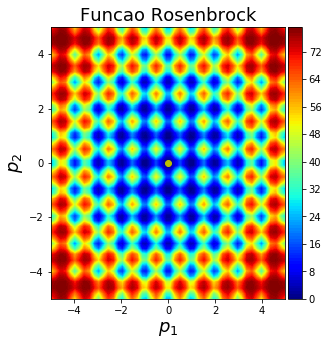

In [3]:
# numero de parametros de p1 e p2
np1 = 50
np2 = 50

#definindo os parâmetros
p1 = np.linspace(-5., 5., np1)
p2 = np.linspace(-5., 5., np2)

#criando um grid
p1, p2 = np.meshgrid(p1, p2)

# calculando a phi
phi = rastrigin([p1,p2])

# equalizando as cores
phi_eq = histeq(phi)
phi_eq = np.reshape(phi_eq,(np1,np2))

#plot
plt.figure(figsize=(5,5))
plt.plot(0., 0., 'oy')
plt.title('Funcao Rosenbrock', fontsize=18)
plt.contourf(p1, p2, phi_eq, 100, cmap='jet')
plt.xlabel('$p_1$', fontsize=18)
plt.ylabel('$p_2$', fontsize=18)
plt.colorbar(pad=0.01, aspect=20, shrink=1)
plt.savefig('plot_rosenbrock.png', pad_inches=0.0)
plt.show()


In [4]:
# chute inicial
p01 = 3.
p02 = -3.

# chute inicial e temperatura inicial
p0 = np.array([p01,p02])
T = 3000.

phi0 = rastrigin(p0)

p1_list = [p01]
p2_list = [p02]
phi_list = [phi0]

itmax = 1000

In [5]:
pm = p0.copy()
phim = phi0
p = pm.copy()
phi = phi0

pmax = np.array([4.5, 4.5])
pmin = np.array([-4.5, -4.5])

for it in range(itmax):
  
    
    for j in range(20):
        # perturbando a solução
        rand = (2*np.random.random(2) - 1.)
        #print rand
        p_vizinho = p + rand
        #print p_vizinho
        if p_vizinho.all() > pmax.all():
            p_vizinho = pmax
        elif p_vizinho.all() < pmin.all():
            p_vizinho = pmin
        #print p_vizinho
        # calculando a função e a variação
        phi_vizinho = rastrigin(p_vizinho)
        #print 'f_vizinho:', phi_vizinho
        delta_phi = phi_vizinho - phi
        #print delta_phi
        # avaliando a função do vizinho
        if delta_phi <= 0.:
            print delta_phi
            p = p_vizinho.copy()
            phi = rastrigin(p)
            #print p, phi
            if phi <= phim:
                pm = p.copy()
                phim = rastrigin(pm)
                break
            else:
                #print delta_phi
                P = np.exp(-delta_phi/T)
                print P
                r = np.random.random(1)
                if r <= P:
                    p = p_vizinho.copy()
                    
        #print pm, phim, p, phi, p_vizinho, phi_vizinho
        
    # armazenando os resultados em listas para o plot
    phi_list.append(phim)
    p1_list.append(pm[0])
    p2_list.append(pm[1])
                    
    print 'iteração: %3d   p1: %.2f   p2: %.2f   f: %.5e    T: %.2f' % (it, pm[0], pm[1], phim, T) , 'rand:', rand
    
    alfa = 0.01
    T *= alfa
    #T = T/(1 + alfa*np.sqrt(T))
    #print T

        

        # armazenando os resultados em listas para o plot
        #phi_list.append(phi0)
        #p1_list.append(p0[0])
        #p2_list.append(p0[1])
    
    # printa os valores
    #print 'vetor de parametros', p0
    #print 'valor da funcao', phi0
    #print 'vetor gradiente', grad

iteração:   0   p1: 3.00   p2: -3.00   f: 1.80000e+01    T: 3000.00 rand: [ 0.55954775  0.65992815]
iteração:   1   p1: 3.00   p2: -3.00   f: 1.80000e+01    T: 30.00 rand: [ 0.16900224 -0.37908477]
iteração:   2   p1: 3.00   p2: -3.00   f: 1.80000e+01    T: 0.30 rand: [ 0.30657066  0.08469494]
iteração:   3   p1: 3.00   p2: -3.00   f: 1.80000e+01    T: 0.00 rand: [-0.52796153  0.07732927]
-4.00463389463
iteração:   4   p1: 2.02   p2: -2.92   f: 1.39954e+01    T: 0.00 rand: [-0.97692181  0.08138789]
-1.97533099026
iteração:   5   p1: 1.10   p2: -2.15   f: 1.20200e+01    T: 0.00 rand: [-0.91821698  0.76931036]
-0.407524208277
iteração:   6   p1: 0.12   p2: -2.98   f: 1.16125e+01    T: 0.00 rand: [-0.98654517 -0.83021779]
-1.30792119405
iteração:   7   p1: -0.07   p2: -2.16   f: 1.03046e+01    T: 0.00 rand: [-0.19067925  0.81993688]
-3.50211067978
iteração:   8   p1: 0.00   p2: -2.11   f: 6.80248e+00    T: 0.00 rand: [ 0.07315368  0.04833689]
-1.25409984093
iteração:   9   p1: -0.97   p2:

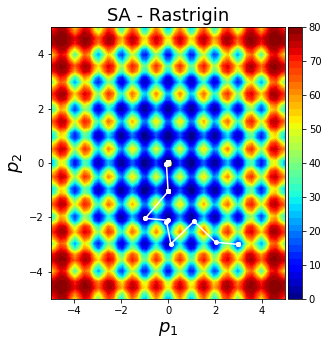

In [6]:
#plot
plt.figure(figsize=(5,5))
plt.plot(0., 0., 'oy')
plt.plot(p1_list, p2_list, '.w-', markersize=8)
plt.title('SA - Rastrigin', fontsize=18)
plt.contourf(p1, p2, phi_eq, 40, cmap='jet')
plt.xlabel('$p_1$', fontsize=18)
plt.ylabel('$p_2$', fontsize=18)
plt.colorbar(pad=0.01, aspect=20, shrink=1)
plt.show()

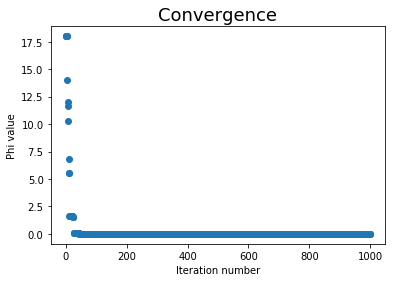

In [7]:
plt.title('Convergence', fontsize = 18)
plt.xlabel('Iteration number')
plt.ylabel('Phi value')
plt.plot(phi_list, 'o')
plt.savefig('convergence.png', dpi=300)
plt.show()